## **New Girl**

_IMDb_ | Ratings

In [33]:
# imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from highlight_text import fig_text

##### **Data Preparation**

In [34]:
title_basics = pd.read_csv("../data/title_basics.csv", low_memory=False)
title_episode = pd.read_csv("../data/title_episode.csv")
title_ratings = pd.read_csv("../data/title_ratings.csv")

In [35]:
ng_loc = title_basics[(title_basics['titleType']=='tvSeries') & (title_basics['primaryTitle'].str.contains('New Girl', case=False))]
ng_loc

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
2650760,tt13073258,tvSeries,My New Girlfriend,My New Girlfriend,0,\N,\N,\N,"Drama,Romance"
4774316,tt1826940,tvSeries,New Girl,New Girl,0,2011,2018,22,"Comedy,Romance"
5752595,tt2247924,tvSeries,Tokyo Brandnew Girls,Tokyo Brandnew Girls,0,2012,\N,30,Talk-Show
7742259,tt3326016,tvSeries,Brave New Girls,Brave New Girls,0,2014,\N,\N,Reality-TV
8341000,tt4687724,tvSeries,New Girls on the Block,New Girls on the Block,0,2015,\N,\N,Reality-TV
10306289,tt9061862,tvSeries,New Girl POV,New Girl POV,1,2015,\N,\N,Adult


tconst = tt1826940

In [36]:
title_episode_ratings = pd.merge(title_episode, title_ratings, on="tconst")

In [37]:
print(title_episode_ratings.shape)
print('')
title_episode_ratings.head()

(712376, 6)



,tconst,parentTconst,seasonNumber,episodeNumber,averageRating,numVotes
0,tt0041951,tt0041038,1,9,7.6,90
1,tt0042816,tt0989125,1,17,7.6,12
2,tt0044093,tt0959862,1,6,4.5,18
3,tt0045960,tt0044284,2,3,6.9,191
4,tt0046150,tt0341798,\N,\N,8.2,12


In [38]:
ng_episode_ratings = title_episode_ratings[title_episode_ratings['parentTconst']=='tt1826940']

In [39]:
print(ng_episode_ratings.shape)
print('')
ng_episode_ratings.head()

(146, 6)



,tconst,parentTconst,seasonNumber,episodeNumber,averageRating,numVotes
394298,tt1941258,tt1826940,1,1,7.5,2943
405490,tt2043466,tt1826940,1,10,7.6,1697
405491,tt2043467,tt1826940,1,12,8.0,1777
405492,tt2043468,tt1826940,1,11,7.8,1656
405493,tt2043469,tt1826940,1,13,7.8,1598


In [40]:
ng_episode_ratings.dtypes

tconst            object
parentTconst      object
seasonNumber      object
episodeNumber     object
averageRating    float64
numVotes           int64
dtype: object

In [41]:
# check for null values
ng_episode_ratings.isna().sum()

tconst           0
parentTconst     0
seasonNumber     0
episodeNumber    0
averageRating    0
numVotes         0
dtype: int64

In [42]:
ng_episode_ratings.loc[:, 'seasonNumber'] = pd.to_numeric(ng_episode_ratings['seasonNumber'], errors='coerce')

In [43]:
ng_episode_ratings.loc[:, 'episodeNumber'] = pd.to_numeric(ng_episode_ratings['episodeNumber'], errors='coerce')

In [44]:
ng_episode_ratings.dtypes

tconst            object
parentTconst      object
seasonNumber      object
episodeNumber     object
averageRating    float64
numVotes           int64
dtype: object

In [45]:
ng_episode_ratings.to_csv('../data/ng_episode_ratings.csv', index=False)

##### **Data Visualization**

In [46]:
from PIL import Image
import urllib

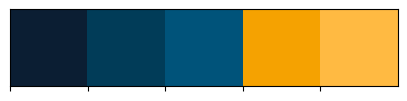

In [47]:
ng_v1 = ['#0B1E33','#013C58', '#00537A','#F5A201', '#FFBA42']
sns.palplot(sns.color_palette(ng_v1))

_**Trendline**_

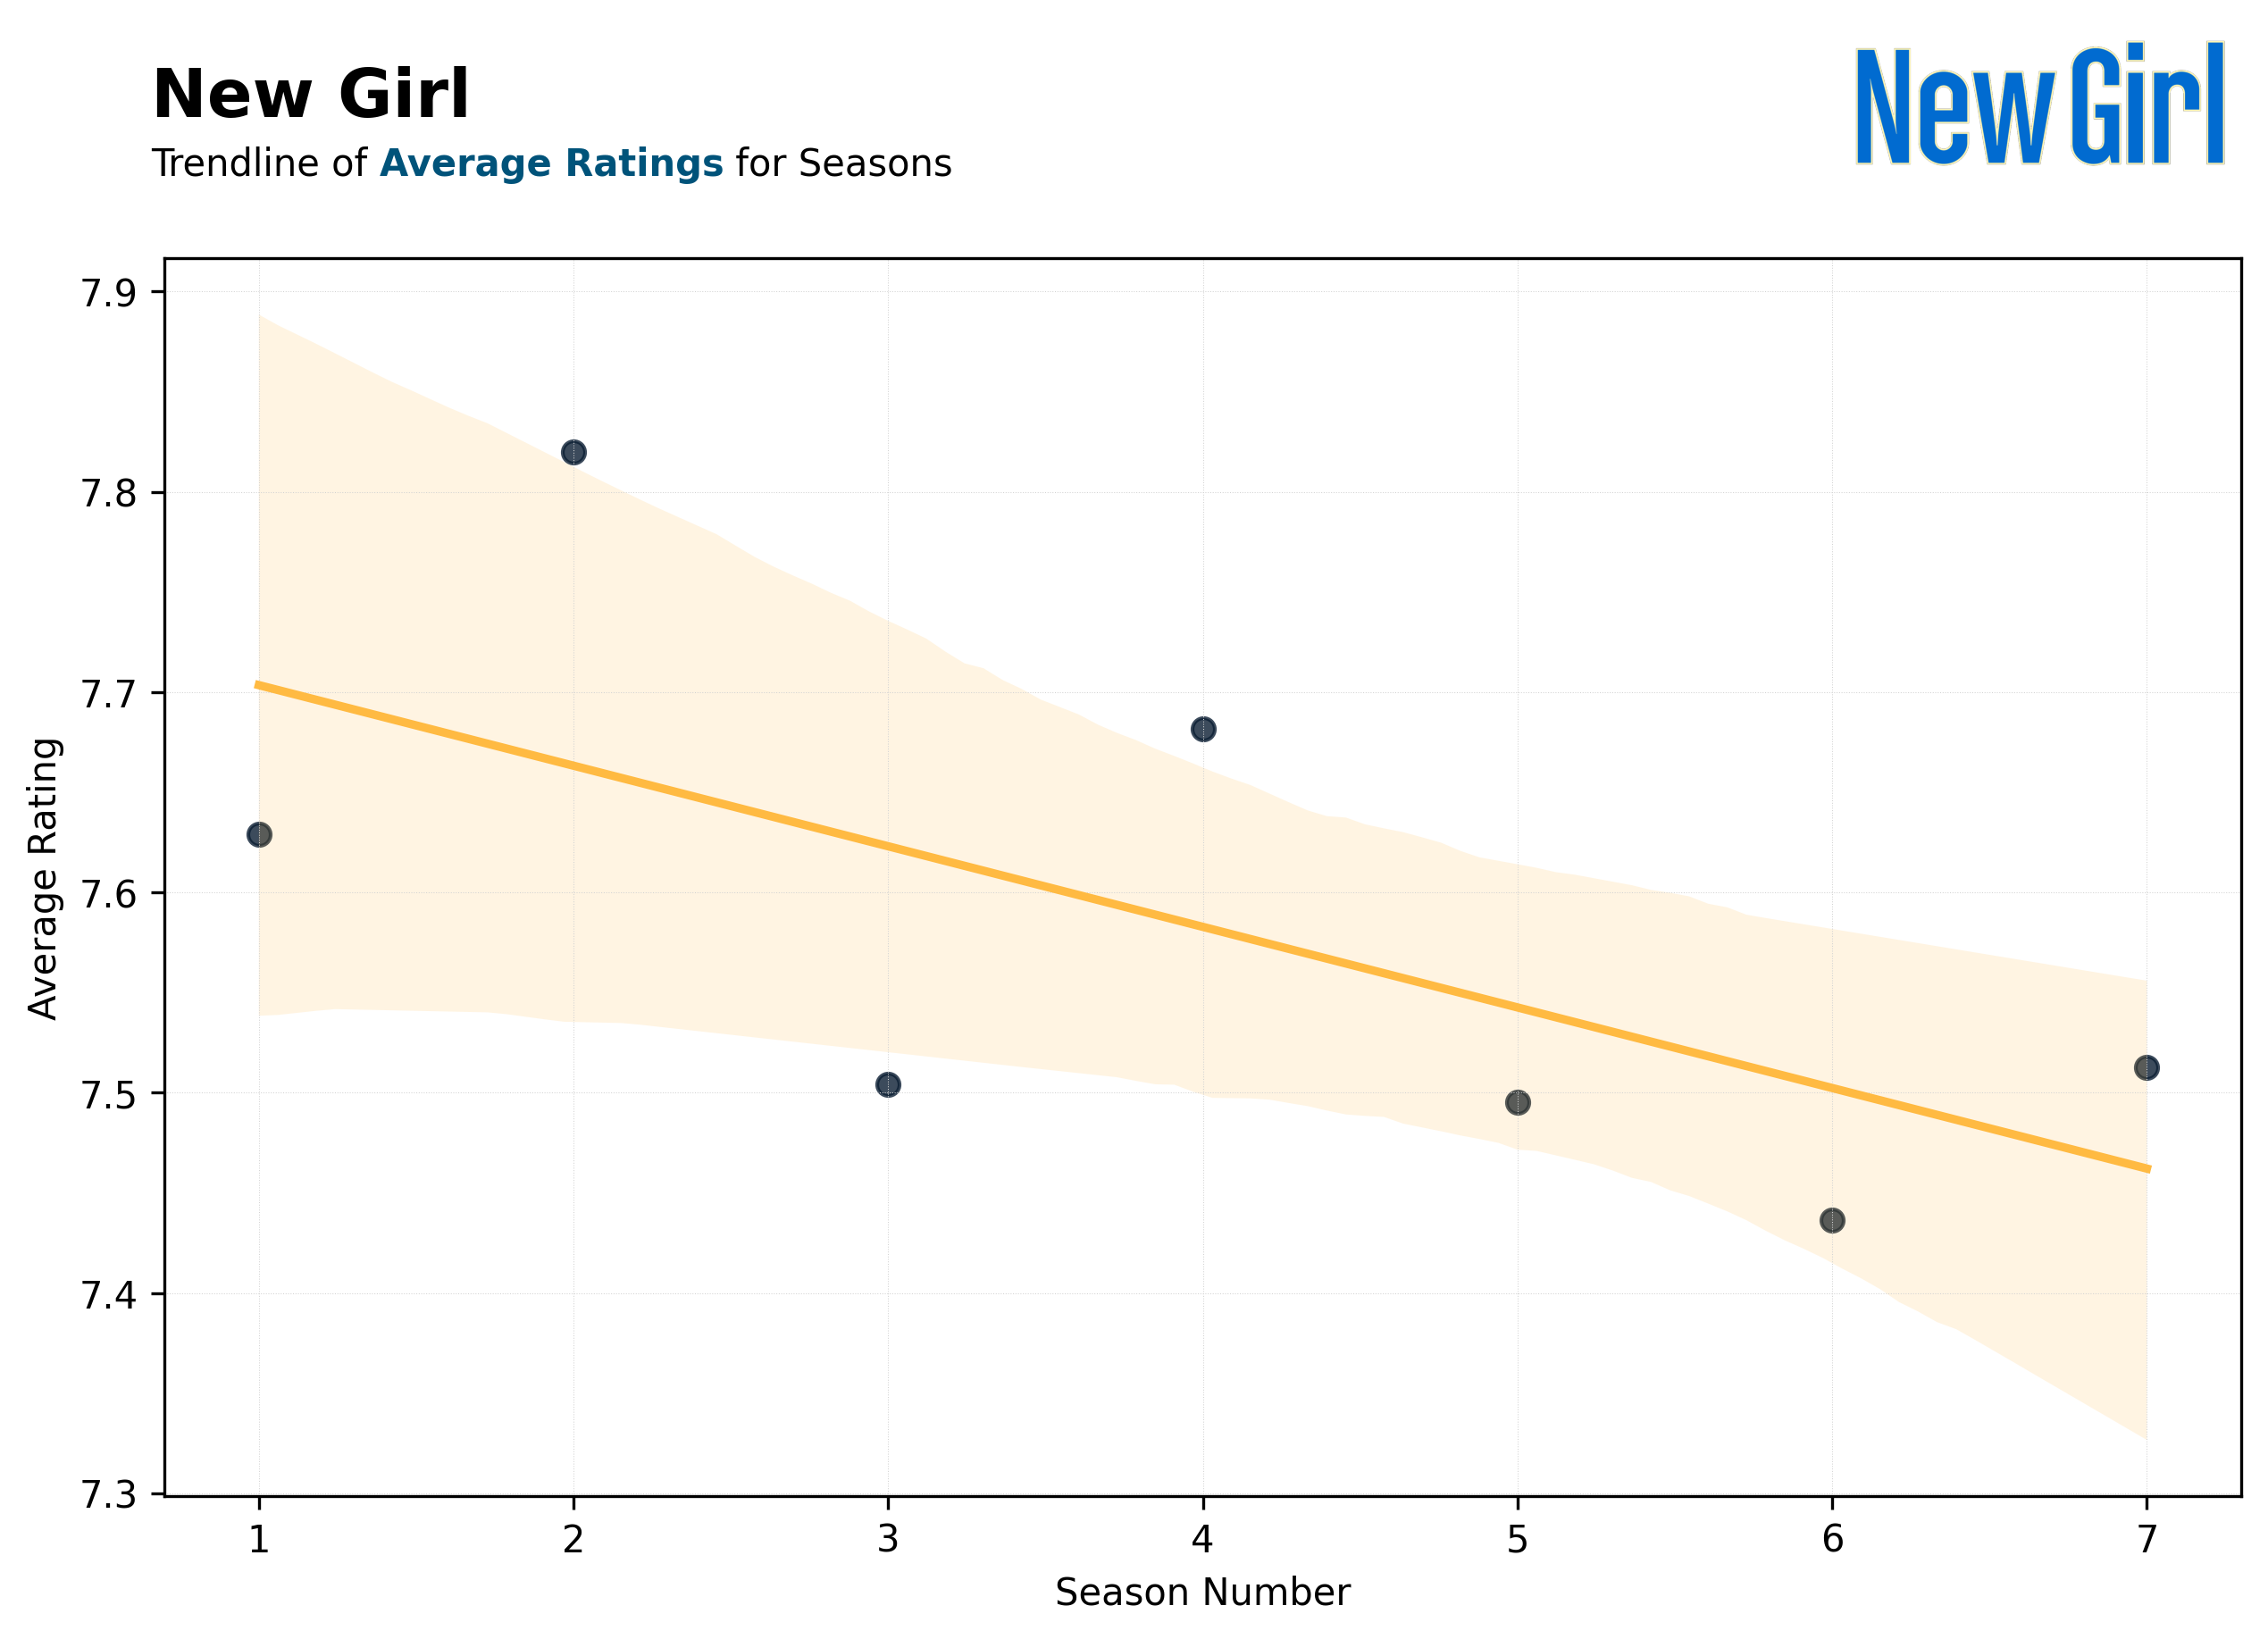

In [48]:
# aggregate ratings by season
df_season_avg_rating = ng_episode_ratings.groupby('seasonNumber')['averageRating'].mean().reset_index()

# plot
fig = plt.figure(figsize=(10, 6), dpi=300, facecolor="white")
ax = plt.subplot(111, facecolor="white")

# set the grid
ax.grid(
    visible = True, 
    lw = 0.25,
    ls = ":",
    color = "lightgrey"
)

sns.regplot(x='seasonNumber', y='averageRating', data=df_season_avg_rating, fit_reg=True, scatter_kws={'color': '#0B1E33'}, line_kws={'color': '#FFBA42'})
plt.xlabel('Season Number')
plt.ylabel('Average Rating')

# set x-axis ticks to display all season numbers
plt.xticks(df_season_avg_rating['seasonNumber'])

# title and subtitle for the legend
fig_text(
    x = 0.12, y = 1,
    s = "New Girl",
    color = "black",
    weight = "bold",
    size = 18,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.12, y = 0.95,
    s = "Trendline of <Average Ratings> for Seasons",
    highlight_textprops=[
        {"color": "#00537A", "weight": "bold"}
    ],
    color = "black",
    size = 10,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

logo_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b8/NewGirl-Logo.svg/1280px-NewGirl-Logo.svg.png"

logo_ax = fig.add_axes([0.75, .9, 0.15, 0.15], zorder=1)
logo_icon = Image.open(urllib.request.urlopen(logo_url))
logo_ax.imshow(logo_icon)
logo_ax.axis("off")

plt.show()

In [49]:
# save figure
fig.savefig('../figures/ng_seasons_avg.png', bbox_inches='tight')

_**Heatmap**_

In [50]:
print(sns.color_palette("coolwarm").as_hex())

['#6788ee', '#9abbff', '#c9d7f0', '#edd1c2', '#f7a889', '#e26952']


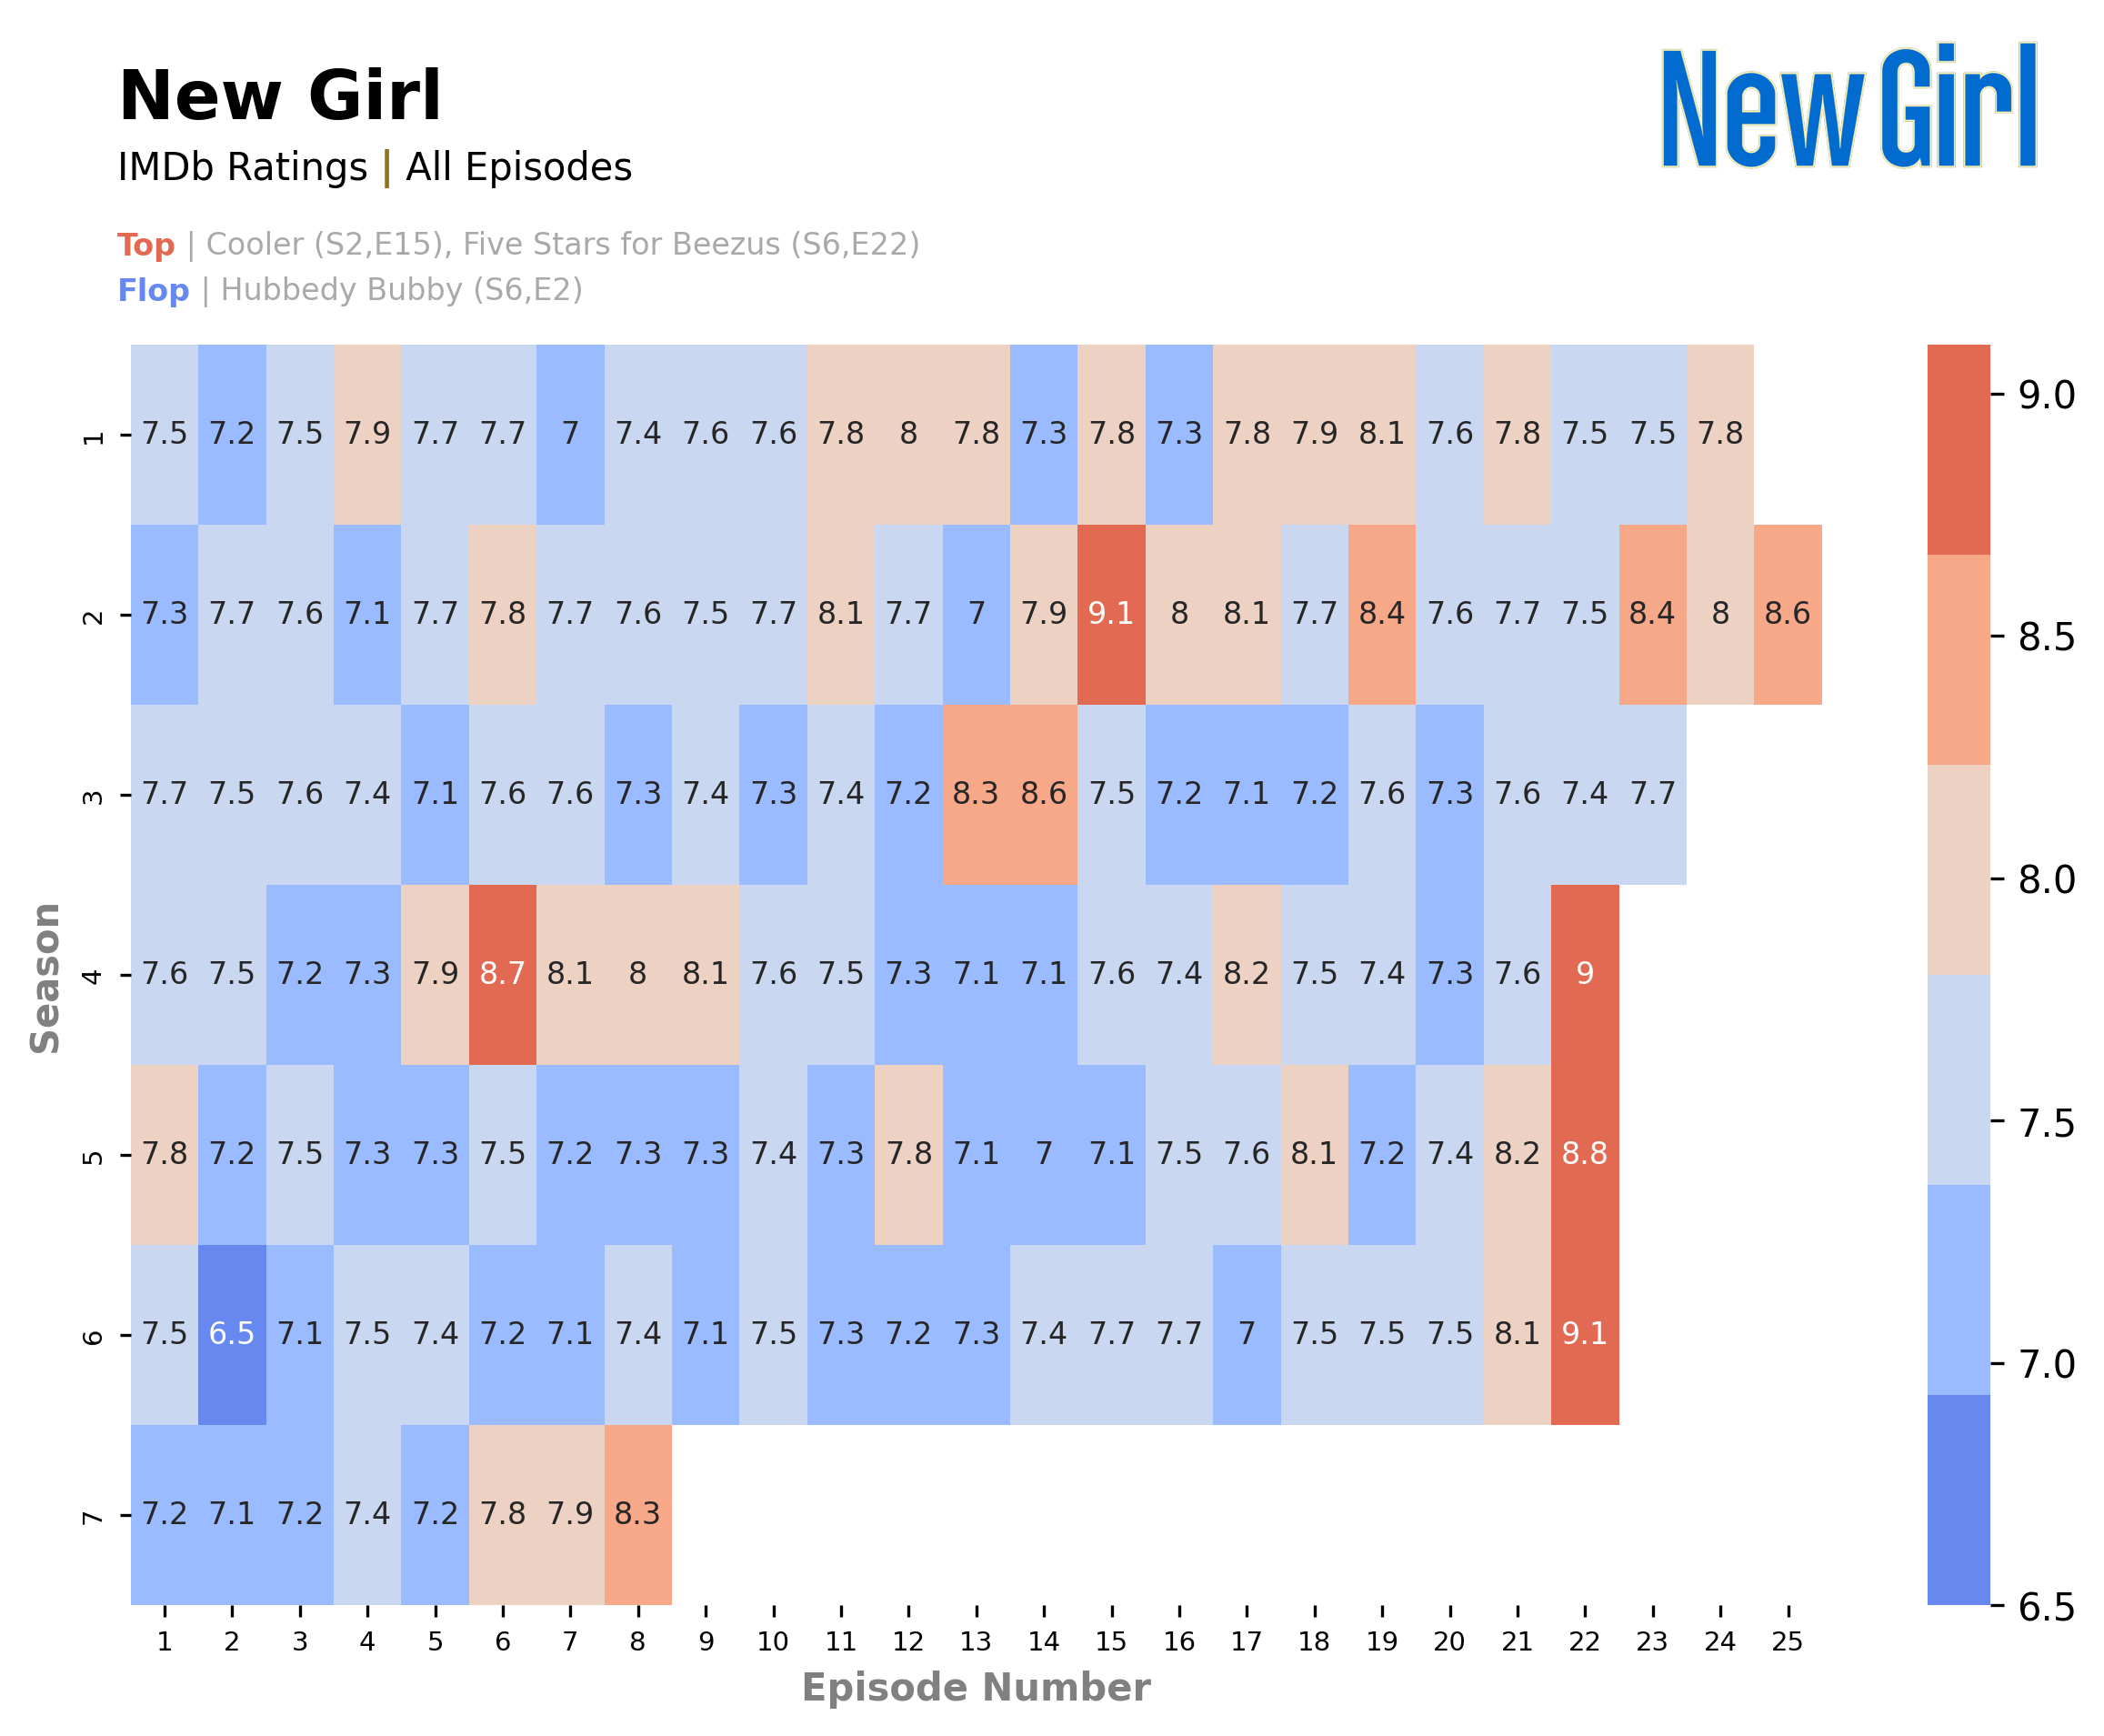

In [51]:
# pivot the dataframe
ng_pivot = ng_episode_ratings.pivot(index='seasonNumber', columns='episodeNumber', values='averageRating')

# plot
fig = plt.figure(figsize=(10, 6), dpi=300, facecolor="white")
ax = plt.subplot(111, facecolor="white")

colormap = sns.color_palette("coolwarm")
sns.heatmap(ng_pivot, annot=True, annot_kws={"size": 8}, cmap=colormap) # size reduce the numbers in the quadrants

# customize the ticks to match spinecolor and adjust label size
ax.tick_params(
    color = "black",
    length = 3,
    which = "major",
    labelsize = 7,
    labelcolor = "black",
    zorder = 3
)

plt.xlabel("Episode Number", color='grey', fontsize=10, weight='bold')
plt.ylabel("Season", color='grey', fontsize=10, weight='bold')

# title and subtitle for the legend
fig_text(
    x = 0.12, y = 1.05,
    s = "New Girl",
    color = "black",
    weight = "bold",
    size = 18,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.12, y = 1,
    s = "IMDb Ratings <|> All Episodes",
    highlight_textprops=[
        {"color": "#917416", "weight": "bold"}
    ],
    color = "black",
    size = 10,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.12, y = 0.95,
    s = "<Top> | Cooler (S2,E15), Five Stars for Beezus (S6,E22)\n<Flop> | Hubbedy Bubby (S6,E2)",
    highlight_textprops=[
        {"color": "#E26952", "weight": "bold"},
        {"color": "#6788EE", "weight": "bold"}
    ],
    color = "darkgrey",
    size = 8,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

logo_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b8/NewGirl-Logo.svg/1280px-NewGirl-Logo.svg.png"

logo_ax = fig.add_axes([0.68, .95, 0.15, 0.15], zorder=1)
logo_icon = Image.open(urllib.request.urlopen(logo_url))
logo_ax.imshow(logo_icon)
logo_ax.axis("off")

plt.show()

In [52]:
# save figure
fig.savefig('../figures/ng_ratings_coolwarm.png', bbox_inches='tight')

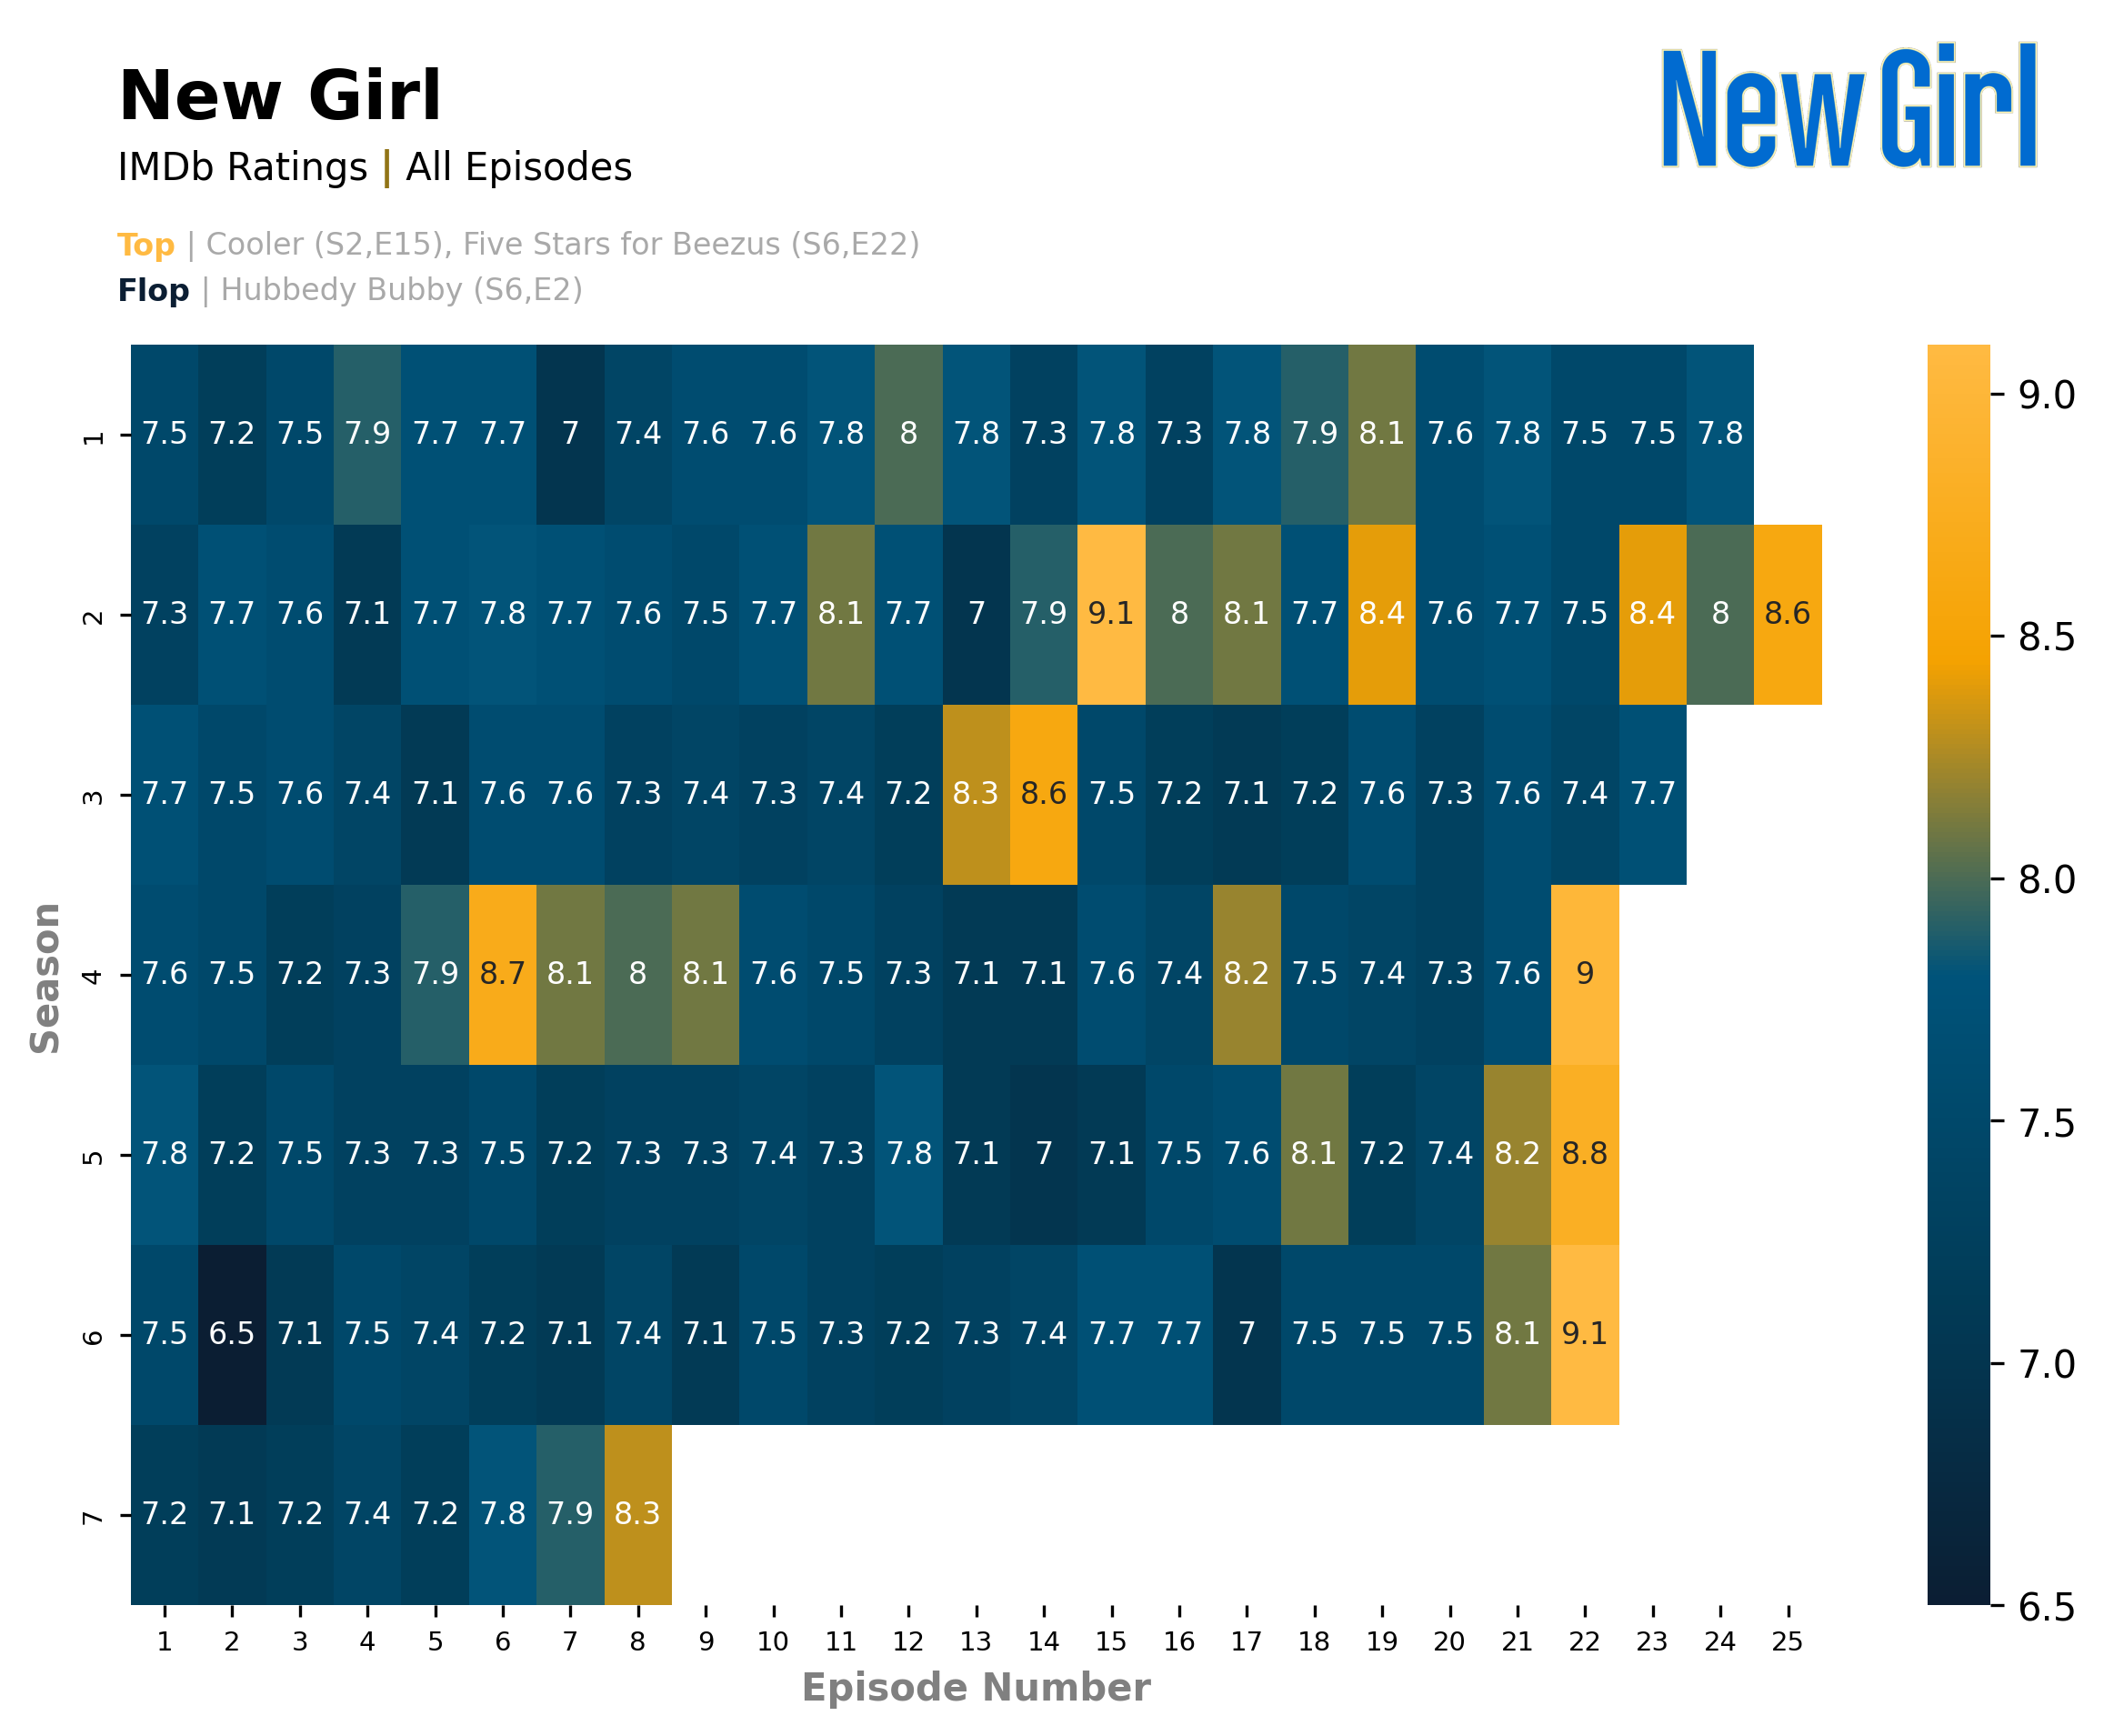

In [53]:
from matplotlib.colors import LinearSegmentedColormap

# Define your custom colormap using hex colors
colors_hex = ['#0B1E33','#013C58', '#00537A','#F5A201', '#FFBA42']
colors_rgb = [(int(color[1:3], 16) / 255, int(color[3:5], 16) / 255, int(color[5:7], 16) / 255) for color in colors_hex]  # Convert hex to RGB
cmap_name = 'custom_cmap'
cm = LinearSegmentedColormap.from_list(cmap_name, colors_rgb, N=256)

# pivot the dataframe
ng_pivot = ng_episode_ratings.pivot(index='seasonNumber', columns='episodeNumber', values='averageRating')

# plot
fig = plt.figure(figsize=(10, 6), dpi=300, facecolor="white")
ax = plt.subplot(111, facecolor="white")

colormap = sns.color_palette("coolwarm")
sns.heatmap(ng_pivot, annot=True, annot_kws={"size": 8}, cmap=cm) # size reduce the numbers in the quadrants

# customize the ticks to match spinecolor and adjust label size
ax.tick_params(
    color = "black",
    length = 3,
    which = "major",
    labelsize = 7,
    labelcolor = "black",
    zorder = 3
)

plt.xlabel("Episode Number", color='grey', fontsize=10, weight='bold')
plt.ylabel("Season", color='grey', fontsize=10, weight='bold')

# title and subtitle for the legend
fig_text(
    x = 0.12, y = 1.05,
    s = "New Girl",
    color = "black",
    weight = "bold",
    size = 18,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.12, y = 1,
    s = "IMDb Ratings <|> All Episodes",
    highlight_textprops=[
        {"color": "#917416", "weight": "bold"}
    ],
    color = "black",
    size = 10,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.12, y = 0.95,
    s = "<Top> | Cooler (S2,E15), Five Stars for Beezus (S6,E22)\n<Flop> | Hubbedy Bubby (S6,E2)",
    highlight_textprops=[
        {"color": "#FFBA42", "weight": "bold"},
        {"color": "#0B1E33", "weight": "bold"}
    ],
    color = "darkgrey",
    size = 8,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

logo_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b8/NewGirl-Logo.svg/1280px-NewGirl-Logo.svg.png"

logo_ax = fig.add_axes([0.68, .95, 0.15, 0.15], zorder=1)
logo_icon = Image.open(urllib.request.urlopen(logo_url))
logo_ax.imshow(logo_icon)
logo_ax.axis("off")

plt.show()

In [54]:
# save figure
fig.savefig('../figures/ng_ratings_custom1.png', bbox_inches='tight')